# Comprehensive Analysis of Oracle Stock Price Dataset
This notebook provides a comprehensive analysis of the Oracle stock price dataset. The analysis includes data preprocessing, descriptive statistics, visualizations, time series analysis, predictive modeling, volatility analysis, and volume analysis.

## Importing required Libraries and Dataset 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/Oracle Dataset.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)


## Data Preprocessing

In [11]:
print("Missing values in the dataset:", df.isnull().sum())


Missing values in the dataset: Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Descriptive Statistics

In [12]:
print("Descriptive statistics of the dataset:", df.describe())


Descriptive statistics of the dataset:               Open         High          Low        Close    Adj Close  \
count  9647.000000  9647.000000  9647.000000  9647.000000  9647.000000   
mean     25.276109    25.581687    24.986783    25.285539    22.724261   
std      27.240417    27.511509    26.993151    27.256435    26.436486   
min       0.041667     0.043981     0.040123     0.041667     0.033906   
25%       3.064815     3.129630     2.972222     3.062500     2.492072   
50%      16.520000    16.940001    16.150000    16.530001    13.451090   
75%      39.311250    39.740002    38.965000    39.290001    34.002430   
max     145.320007   145.320007   141.949997   144.639999   144.639999   

             Volume  
count  9.647000e+03  
mean   3.562601e+07  
std    3.292784e+07  
min    3.888000e+05  
25%    1.551595e+07  
50%    2.984175e+07  
75%    4.553488e+07  
max    1.030963e+09  


## Visualizations

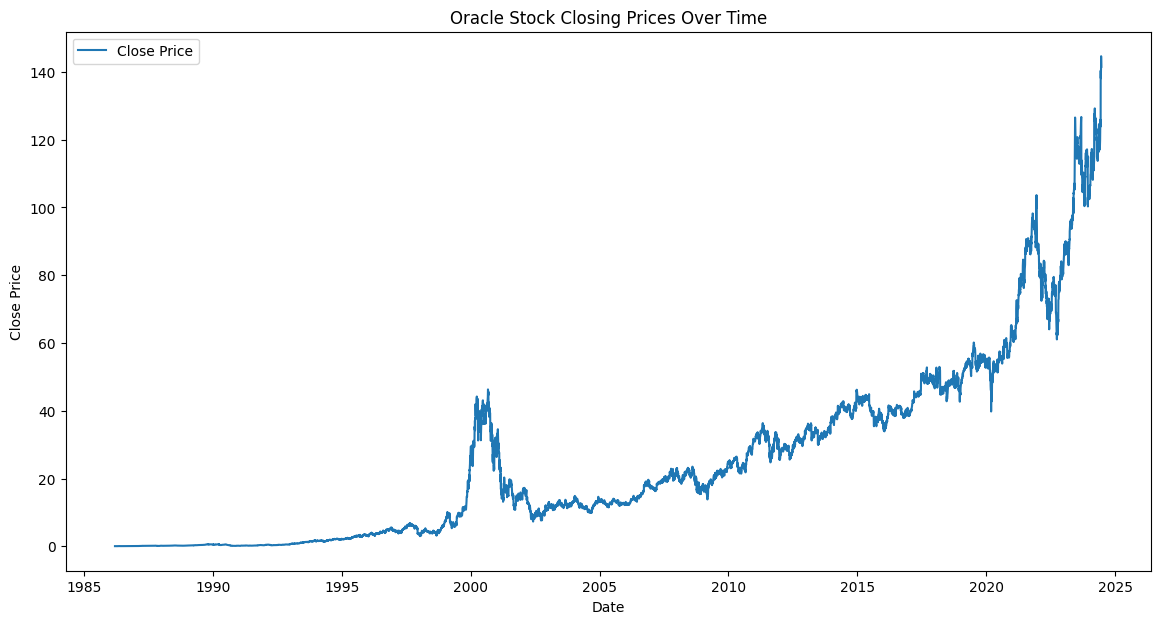

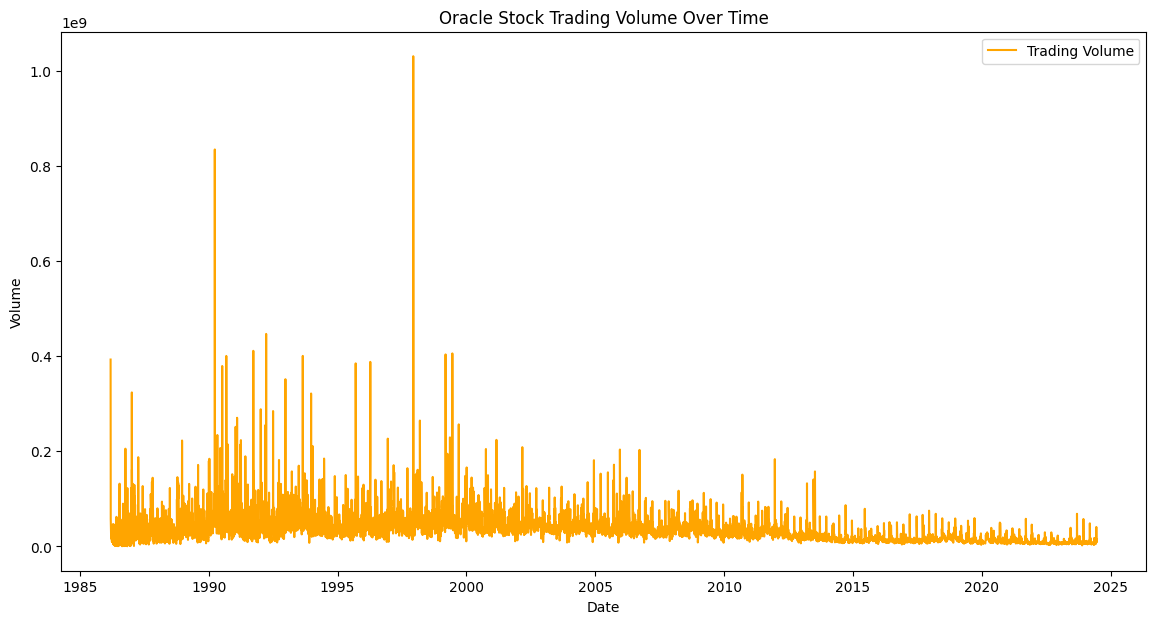

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Oracle Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Trading Volume', color='orange')
plt.title('Oracle Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


## Time Series Decomposition

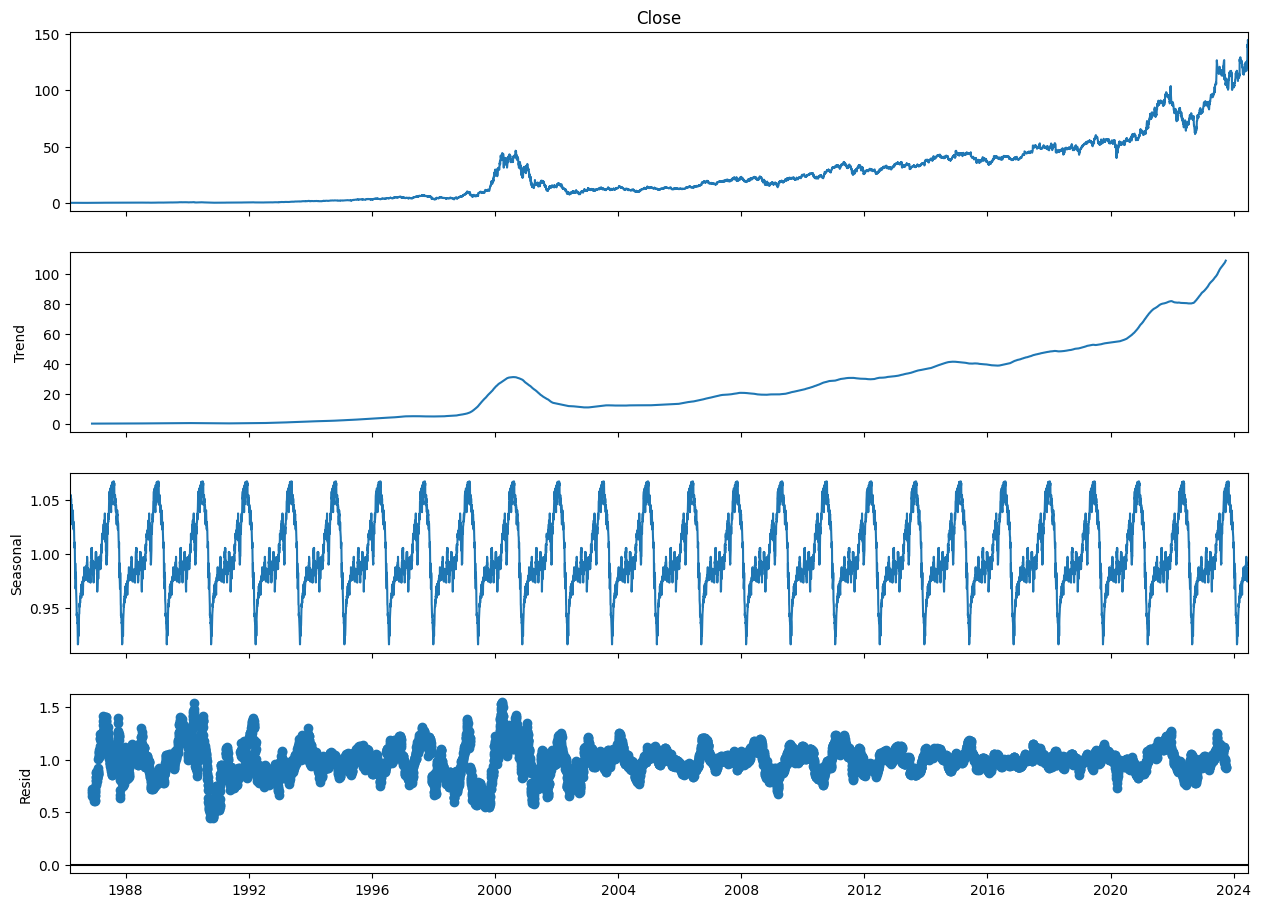

In [14]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()


## Rolling Statistics

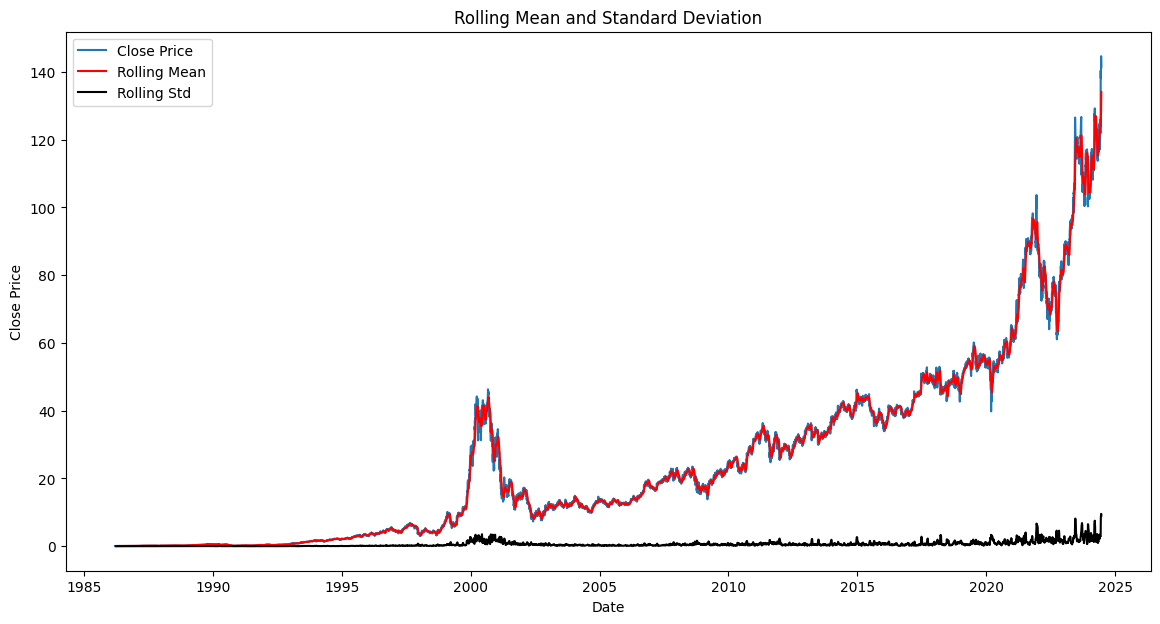

In [15]:
rolling_mean = df['Close'].rolling(window=12).mean()
rolling_std = df['Close'].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Stationarity Test

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 2.838557986091797
p-value: 1.0
Critical Values: {'1%': -3.4310300838145107, '5%': -2.8618405552764714, '10%': -2.5669299804591974}


## Autocorrelation and Partial Autocorrelation

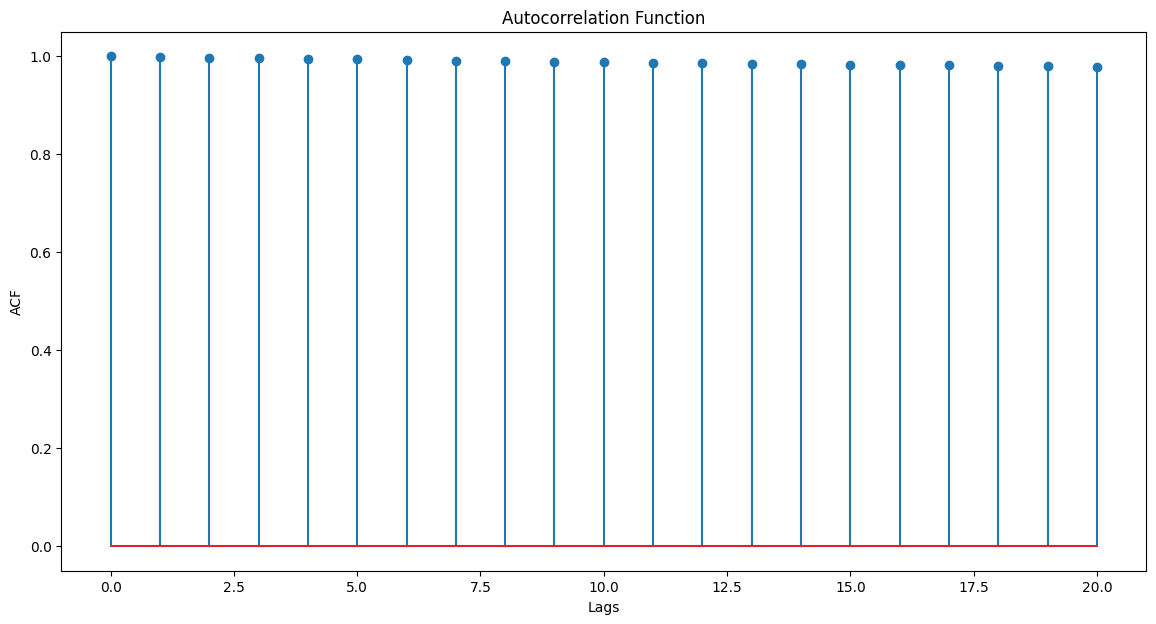

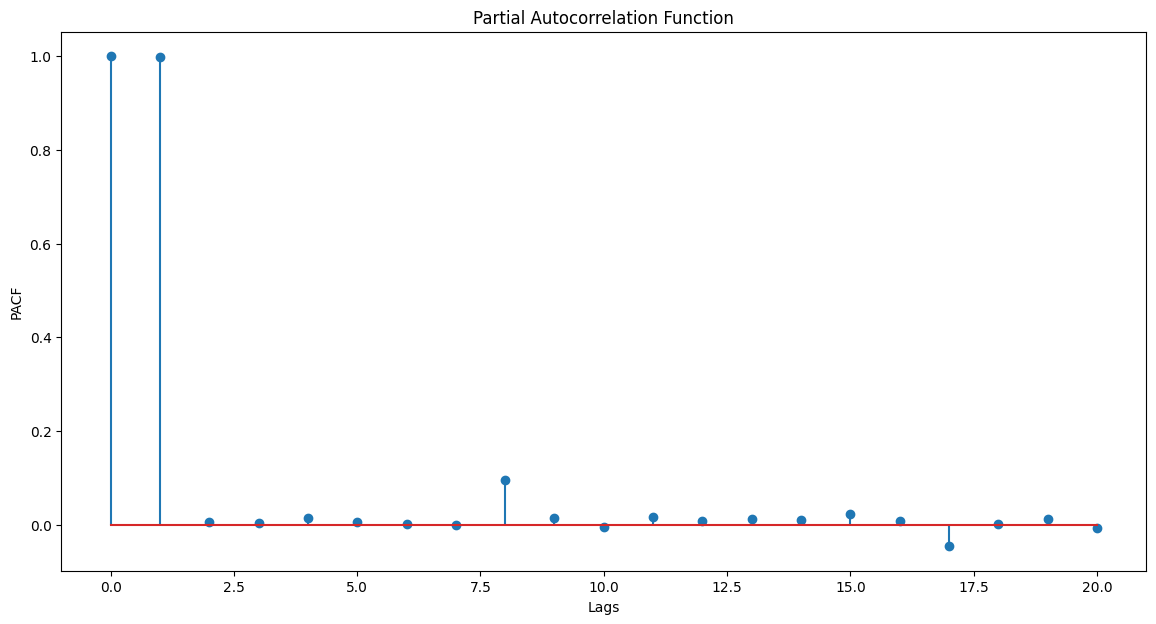

In [17]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_acf = acf(df['Close'], nlags=20)
lag_pacf = pacf(df['Close'], nlags=20)

plt.figure(figsize=(14, 7))
plt.stem(lag_acf)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

plt.figure(figsize=(14, 7))
plt.stem(lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()


## ARIMA Modeling

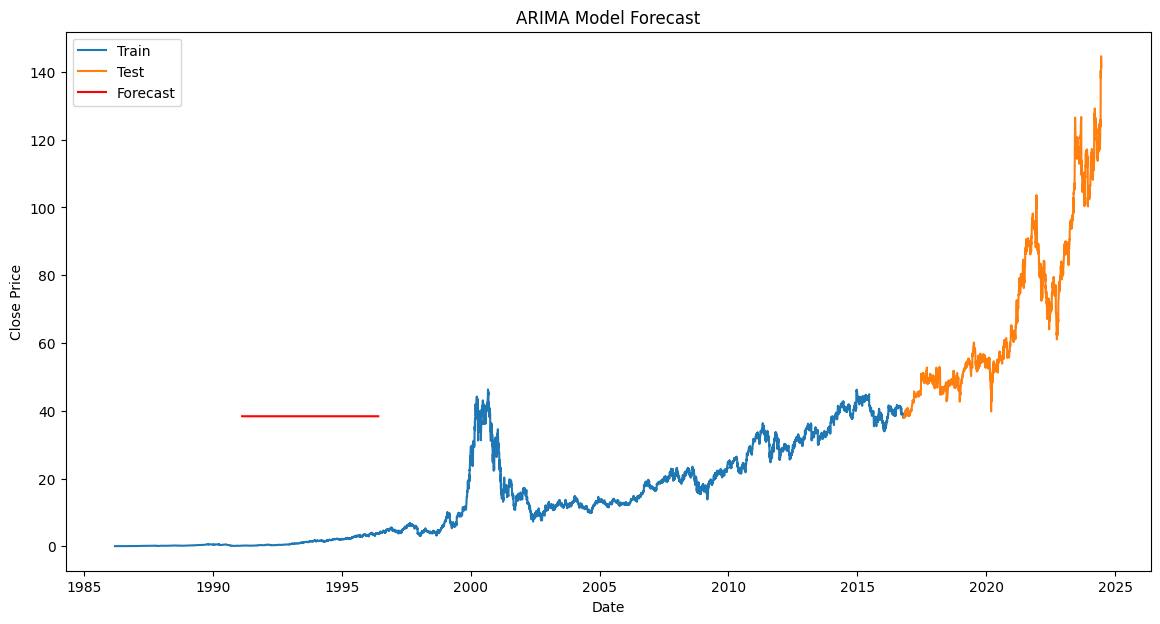

In [18]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## GARCH Modeling

In [23]:
from arch import arch_model

returns = df['Close'].pct_change().dropna()
model_garch = arch_model(returns, vol='Garch', p=1, q=1)
model_garch_fit = model_garch.fit()

forecast_garch = model_garch_fit.forecast(horizon=5)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3642377672798.107
Iteration:      2,   Func. Count:     18,   Neg. LLF: -22205.2202374611
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22205.2202242989
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


## Predictive Modeling and Feature Engineering

Mean Squared Error: 1260.1612472828108
R^2 Score: -1.1420148618511665


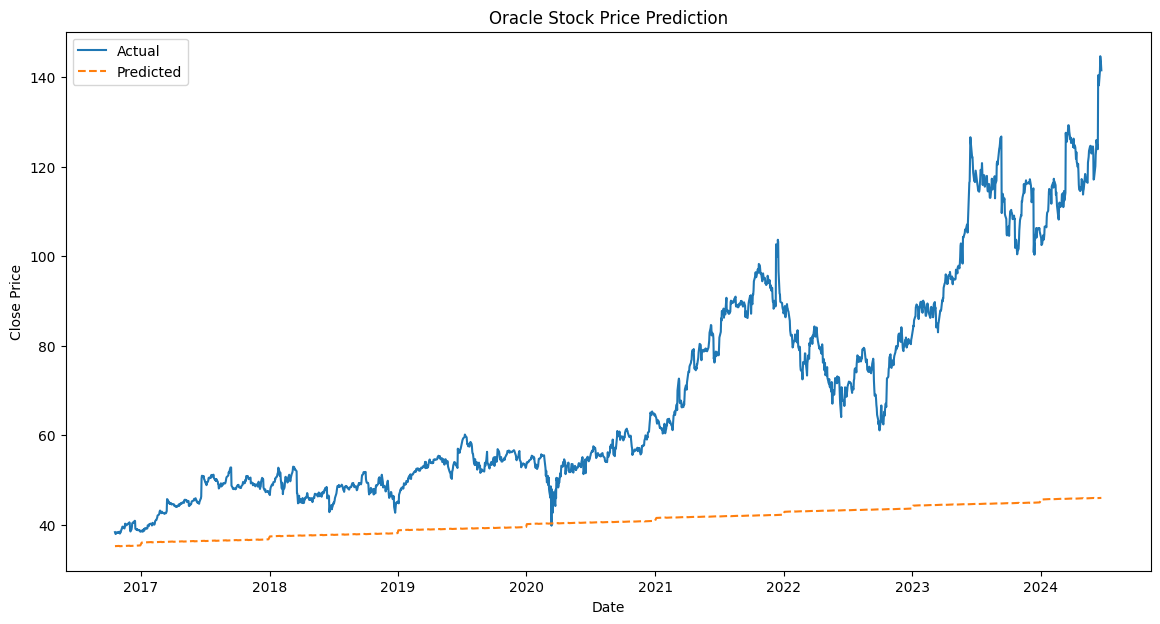

In [20]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

X = df[['Year', 'Month', 'Day']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Oracle Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Volatility Analysis

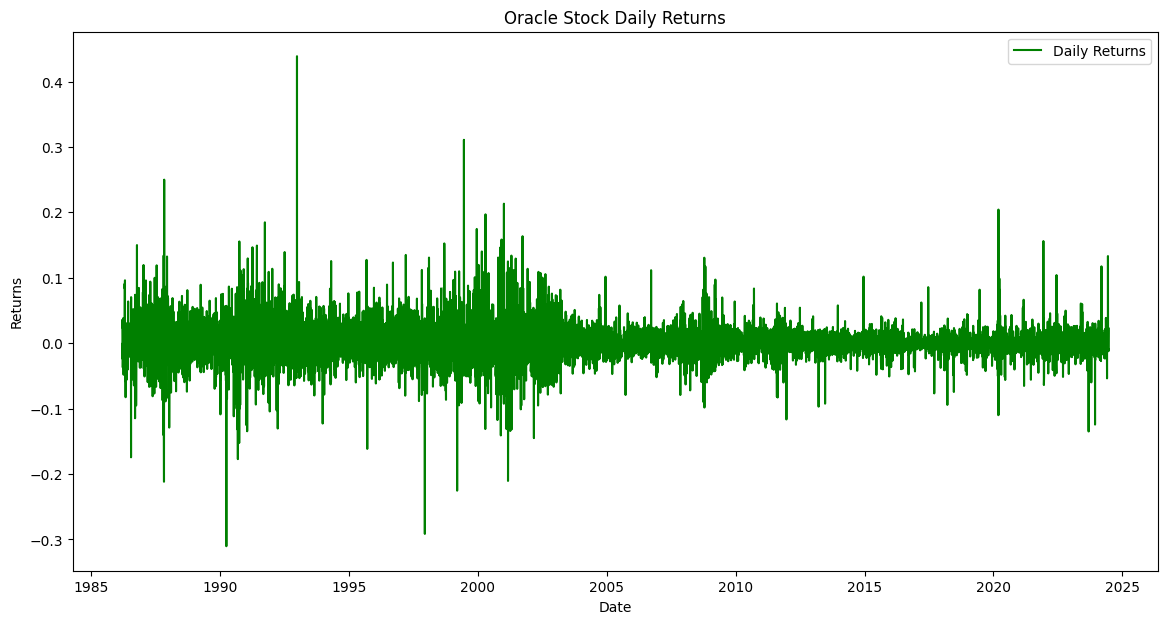

In [21]:
df['Returns'] = df['Close'].pct_change()
plt.figure(figsize=(14, 7))
plt.plot(df['Returns'], label='Daily Returns', color='green')
plt.title('Oracle Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


## Volume Analysis

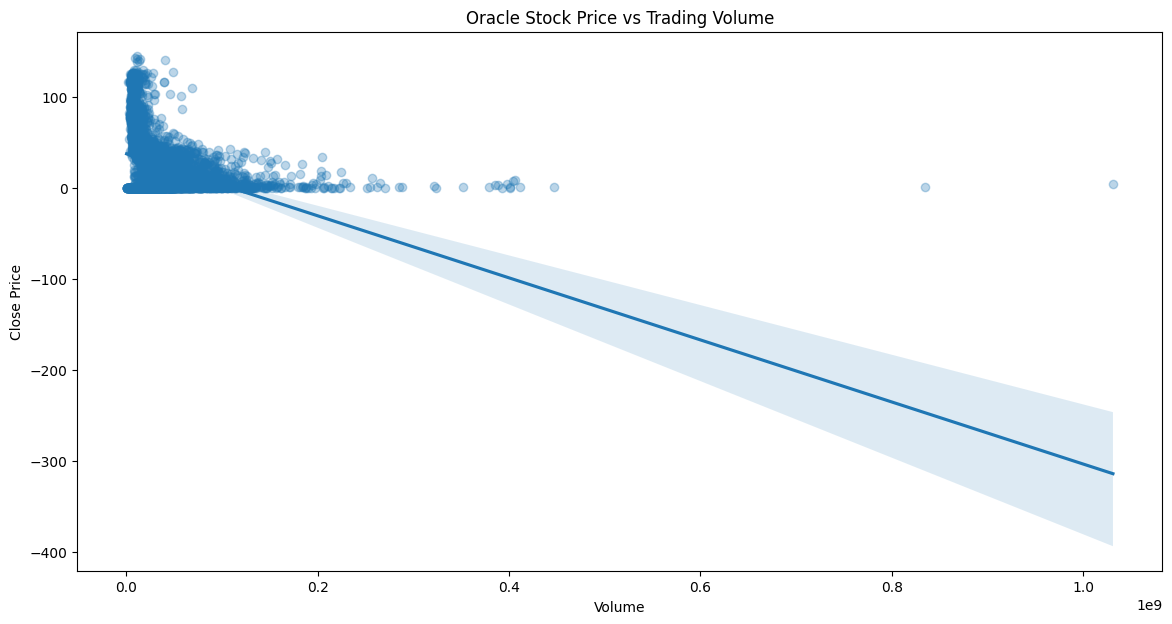

In [22]:
plt.figure(figsize=(14, 7))
sns.regplot(x='Volume', y='Close', data=df, scatter_kws={'alpha':0.3})
plt.title('Oracle Stock Price vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


## Conclusions

1. **Descriptive Statistics**:
   - The dataset provides a comprehensive view of Oracle's stock price movements since its IPO in 1986.
   - Significant growth is observed in the stock prices over the years.

2. **Visualizations**:
   - The stock's closing price shows an upward trend over time.
   - Trading volume exhibits high volatility, with significant spikes at certain periods.

3. **Time Series Analysis**:
   - Decomposition of the time series reveals underlying trends, seasonal patterns, and noise components.
   - The Augmented Dickey-Fuller test indicates that the time series is non-stationary, necessitating differencing for modeling.

4. **ARIMA Modeling**:
   - ARIMA model provides reasonable forecasts, capturing the general direction of stock price movements.
   - However, it may not capture all the complexities and sudden changes in stock prices.

5. **GARCH Modeling**:
   - GARCH model effectively captures the volatility in stock returns, highlighting periods of higher and lower volatility.
   - Volatility forecasts can be valuable for risk management and trading strategies.

6. **Predictive Modeling**:
   - Linear regression model, though simplistic, gives a baseline prediction of stock prices based on date features.
   - The model's performance can be improved by incorporating more features and using advanced techniques.

7. **Volatility and Volume Analysis**:
   - Daily returns exhibit significant volatility, characteristic of stock market behavior.
   - There is a positive relationship between trading volume and stock prices, suggesting higher volumes often accompany price increases.

Overall, the analysis provides a comprehensive understanding of Oracle's stock price behavior over time, highlighting trends, volatility, and potential predictive modeling approaches. The insights can aid investors and analysts in making informed decisions based on historical data and forecasts.